# Characterizing an observed probability distribution

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import slideUtilities as sl
import laUtilities as ut
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML
print('')

In [26]:
%%html
<style>
 .container.slides .celltoolbar, .container.slides .hide-in-slideshow {
    display: None ! important;
}
</style>

%Set up useful MathJax (Latex) macros.
%See http://docs.mathjax.org/en/latest/tex.html#defining-tex-macros
%These are for use in the slideshow
$\newcommand{\mat}[1]{\left[\begin{array}#1\end{array}\right]}$
$\newcommand{\vx}{{\mathbf x}}$
$\newcommand{\hx}{\hat{\mathbf x}}$
$\newcommand{\vbt}{{\mathbf\beta}}$
$\newcommand{\vy}{{\mathbf y}}$
$\newcommand{\vz}{{\mathbf z}}$
$\newcommand{\R}{{\mathbb{R}}}$
$\newcommand{\vu}{{\mathbf u}}$
$\newcommand{\vv}{{\mathbf v}}$
$\newcommand{\vw}{{\mathbf w}}$
$\newcommand{\col}{{\operatorname{Col}}}$
$\newcommand{\nul}{{\operatorname{Nul}}}$
$\newcommand{\vb}{{\mathbf b}}$
$\newcommand{\va}{{\mathbf a}}$
$\newcommand{\ve}{{\mathbf e}}$
$\newcommand{\setb}{{\mathcal{B}}}$
$\newcommand{\rank}{{\operatorname{rank}}}$
$\newcommand{\vp}{{\mathbf p}}$

## Entropy

The **information content** (also called the surprisal) of an event $E$ is defined as:

$$I(E)=-\log _{2}(p(E))=\log _{2}(1/p(E))$$ 



The entropy measures the expected (i.e., average) amount of information conveyed by identifying the outcome of a random trial. This implies that casting a die ($p=1/6$) has higher entropy than tossing a coin ($p=1/2$) because each outcome of a die toss has smaller probability .

**Definition**: Given a random variable $X$, with possible outcomes $x_i$, each with probability $P(x_{i})$, the entropy $H(X)$ of $X$ is as follows:

$$H(X)=-\sum _{i}P(x_{i})\log _{2}P(x_{i})=\sum _{i}P(x_{i})I(x_{i})=\mathbb{E} [I_{X}]$$

**Example:** The entropy of the outcome of a die

$E =\{E_i\}$, $i=1,2,3,4,5,6$

$P(E_i)=1/6$

$H(E)=-6\; \frac{1}{6}\log_2\frac{1}{6}=-\log_2\frac{1}{6}=\log_2 6 $


**Example:** The entropy of a random coin

$E=\{E_1,E_2\}$ $P(E_1)=P(E_2)=1/2$

$H(E)=\log_2 2 $

**Example:** The entropy of a coin with two heads (or two tails)

Entropy is 0.

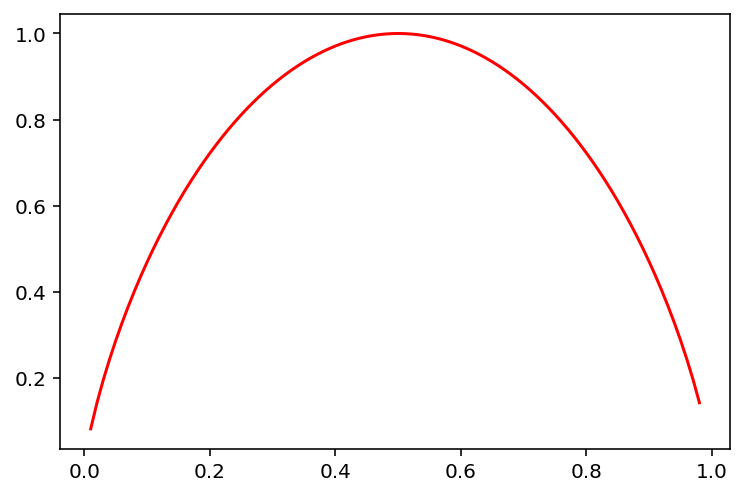

In [9]:

# evenly sampled time at 200ms intervals
p = np.arange(0.01, 0.99, 0.01)
H = -p*np.log2(p)-(1-p)*np.log2(1-p)
plt.plot(p, H,'r-')
plt.show()

To understand the meaning of $H(X)$ we need to understand some properties of $I(p)=\log_2\left(\frac{1}{p}\right)$

-- $I(p)$ is monotonically decreasing in $p$ : an increase in the probability of an event decreases the information from an observed event, and vice versa.

-- $I(p) \geq 0$ : information is a non-negative quantity.

-- $I(1) = 0$ : events that always occur do not communicate information.

-- $I(p_1 \; p_2) = I(p_1) + I(p_2)$ : information due to independent events is additive. Or: 
the joint probability of independent sources of information communicates as much information as the two individual events separately. 

The **conditional entropy** of two events $X$ and $Y$ taking values $x_{i}$ and $y_{j}$ respectively, is defined as

$$H(X|Y)=-\sum _{i,j}p(x_{i},y_{j})\log {\frac {p(x_{i},y_{j})}{p(y_{j})}}$$

where $p(x_{i},y_{j})$ is the probability that $X=x_{i}$ and $Y=y_{j}$. This quantity should be understood as the amount of randomness in the random variable $X$ given the random variable $Y$.

If $X$ and $Y$ are two independent random variables, then knowing the value of $Y$ doesn't influence our knowledge of the value of $X$ (since the two don't influence each other by independence) thus:

$$H (X|Y)=H (X).$$

The entropy of two simultaneous events is no more than the sum of the entropies of each individual event, and are equal if the two events are independent. Thus: 

$$H (X,Y)\leq H (X)+H (Y). $$

$$H(X|Y)? H(X)$$